In [4]:
#Membaca file csv
import pandas as pd
df =pd.read_csv('Cob1.csv',engine='python',sep=';',error_bad_lines=False)

In [5]:
#Melihat 5 data teratas
df.head()

,Text,Id
0,Ada pula Antares sistem yang memberikan kemuda...,1295661811895681026
1,Jadi menteri pendidikan memang pusing banget s...,1293877300321071104
2,Untung aja tadi sekolah online ga telattt...hu...,1294114998935908352
3,RT @crushgyu: udah kpopers + sekolah online ud...,1296140798191259650
4,Salah satu curhatan anak sma ngerasain sekolah...,1296139533130412032


In [6]:
#Menganalisa variabel yang terdapat pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2808 entries, 0 to 2807
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2808 non-null   object
 1   Id      2808 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.0+ KB


In [7]:
#Membuang kolom ID 
df.drop(['Id'],axis=1,inplace=True)

In [8]:
#Membuat kolom untuk mengecek panjang tweet
df['pre_clean_len'] = [len(t) for t in df.Text]

In [9]:
from pprint import pprint
data_dict = {
    #Melakukan pengecekkan tipe data variabel
    'Text':{
        'type':df.Text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    #Melihat dimensi dataset 
    'dataset_shape':df.shape
}
pprint(data_dict)

{'Text': {'description': 'tweet text', 'type': dtype('O')},
 'dataset_shape': (2808, 2),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')}}


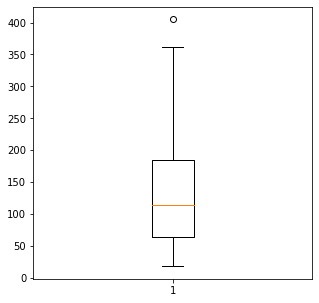

In [10]:
#barplot untuk persebaran panjang tweet
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [11]:
#Menampilkan 10 data teratas tweet yang panjangnya diatas 140
df[df.pre_clean_len > 140].head(10)

,Text,pre_clean_len
0,Ada pula Antares sistem yang memberikan kemuda...,274
1,Jadi menteri pendidikan memang pusing banget s...,226
4,Salah satu curhatan anak sma ngerasain sekolah...,214
5,@tokopedia Ngga ada uang buat nabung karena n...,311
7,ribet banget soalnya sekolah gue tuh absen mul...,247
10,@kaktushidup20 Gatau keknya engga. Hrsnya. Ami...,293
12,Waktu belajar ini sih masalah utama kita semua...,288
18,trs lewat dari dua minggu itu langsung sekolah...,164
20,Kerjaan online gue banyak\n\n1. Sekolah online...,148
22,@S_AshelJKT48 Belum de baru mau log in kamu ti...,141


In [12]:
df.Text[0]

'Ada pula Antares sistem yang memberikan kemudahan dalam mengembangkan aplikasi IoT juga SIplah Blanja sistem khusus pengadaan barang & jasa sekolah melalui  online marketplace.\n\nSobat mari gelorakan semangat dan terus berinovasi untuk negeri. \n___\n#SelaluAda #UntukIndonesia'

In [13]:
df['Text']=df['Text'].str.replace('(?:\@|https?\://)\S+', '')
df['Text']=df['Text'].str.replace('[^\w\s]',' ')
#ilangin angka
df['Text']=df['Text'].str.replace('\d+',' ')
#ilangin enter
df['Text']=df['Text'].str.lower()
#ilangin spasi berlebih
df['Text'] = df['Text'].replace('\s+', ' ', regex=True)
#ilangin simbol
df['Text'] = df['Text'].replace('\n',' ',regex=True)

In [16]:
#Menampilkan 5 data teratas
df.head()

,Text,pre_clean_len
0,ada pula antares sistem yang memberikan kemuda...,274
1,jadi menteri pendidikan memang pusing banget s...,226
2,untung aja tadi sekolah online ga telattt huft...,73
3,rt udah kpopers sekolah online udah deh penyim...,77
4,salah satu curhatan anak sma ngerasain sekolah...,214


In [15]:
#Menyimpan file
df.to_csv('twitklen.csv',columns=['Text'],index=False)